In [1]:
# 라이브러리 불러오기   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# 데이터 불러오기
noc_region = pd.read_csv('./Data/noc_regions.csv')
athlete_events = pd.read_csv('./Data/athlete_events.csv')

In [2]:
#초기 데이터셋 탐색

# noc_region의 열과 행의 갯수 확인
print(noc_region.shape)

# ahtlete_events의 열과 행의 갯수 확인
print(athlete_events.shape)

# noc_region의 상위 5개 데이터 확인
print(noc_region.head())

# athlete_events의 상위 5개 데이터 확인
print(athlete_events.head())


(230, 3)
(271116, 15)
   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  190

In [3]:
# 데이터 병합 outer join
all_data = pd.merge(athlete_events, noc_region, how='outer', on='NOC')

# 병합된 데이터 확인
print(all_data.head())

# all_data의 noc와 noc_region의 noc의 항목명 차집합 확인
print(set(all_data['NOC']) - set(noc_region['NOC']))

# 싱가포르의 NOC가 서로 다름을 확인함.

# athlete_events의 NOC 열의 SGP를 SIN으로 변경
athlete_events['NOC'] = athlete_events['NOC'].replace('SGP', 'SIN')

# 데이터 새로 병합해서 all_data에 저장
all_data = pd.merge(athlete_events, noc_region)

# region, notes 열 대문자로 변경
all_data.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

       ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1.0      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2.0       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602.0  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463.0      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464.0      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

     Year  Season            City       Sport  \
0  1992.0  Summer       Barcelona  Basketball   
1  2012.0  Summer          London        Judo   
2  2000.0  Summer          Sydney      Boxing   
3  2004.0  Summer          Athina   Wrestling   
4  2016.0  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  
2                 Boxing Men's Midd

In [4]:
# 중복치 갯수 확인
print(all_data.duplicated().sum())

# 중복치가 어디서 발생하는지 확인
print(all_data[all_data.duplicated()])

# 5540 부터 5543 행 자세히 출력
print(all_data[5540:5545])

# 중복치 제거
all_data = all_data.drop_duplicates()

# 중복치 제거 확인
print(f"total duplicates : {all_data.duplicated().sum()}")

1385
            ID                                  Name Sex   Age  Height  \
5478     12948                 Thyra Valborg Boldsen   F  48.0     NaN   
5540     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5541     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5542     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5543     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
...        ...                                   ...  ..   ...     ...   
249409  127869              Adolf Wagner von der Mhl   M  44.0     NaN   
259208   23363                            Frane Cota   M  25.0     NaN   
259986   64240                              F. Kroly   M   NaN     NaN   
260363   85115                      Franjo Neidhardt   M   NaN     NaN   
261198  122725                       Vladimir Turina   M  35.0     NaN   

        Weight        Team  NOC        Games  Year  Season         City  \
5478       NaN     Denmark  DEN

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
Region        21
Notes     264696
dtype: int64
            ID                Name Sex   Age  Height  Weight     Team  NOC  \
0            1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1            2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
2          602       Abudoureheman   M  22.0   182.0    75.0    China  CHN   
3         1463           Ai Linuer   M  25.0   160.0    62.0    China  CHN   
4         1464           Ai Yanhan   F  14.0   168.0    54.0    China  CHN   
...        ...                 ...  ..   ...     ...     ...      ...  ...   
271111  120575     Mamorallo Tjoka   F  23.0   150.0    56.0  Lesotho  LES   
271112  120575     Mamorallo Tjoka   F  27.0   150.0    56.0  Lesotho  LES

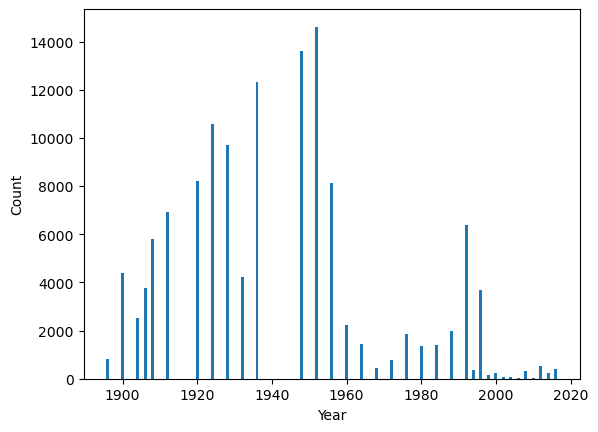

In [5]:
# 결측치 확인
print(all_data.isnull().sum())

# 결측치 있는 행들 확인
print(all_data[all_data.isnull().any(axis=1)])

# Region 결측치 확인
print(all_data[all_data['Region'].isnull()])

# Region 결측치 Team과 동일하게 채워넣기
all_data['Region'] = all_data['Region'].fillna(all_data['Team'])

# Medal 결측치 'No medal'로 채워넣기
all_data['Medal'] = all_data['Medal'].fillna('No medal')

# Notes 결측치 'No notes'로 채워넣기
all_data['Notes'] = all_data['Notes'].fillna('No notes')

# 각 행의 결측치 수를 확인하고 'miss_data' 열로 추가
all_data["miss_data"] = all_data.isnull().sum(axis=1)

# 년도별 결측치 총합 계산 후 내림차순 정렬
n_miss_data = all_data.groupby('Year')['miss_data'].sum().sort_values(ascending=False)

# 시각화
plt.bar(n_miss_data.index, n_miss_data.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


보다시피 결측치가 상당히 많음.
60년대 이전으로 많이 분포하고 있는데.
이를 버릴 수가 없었음. 중요한 데이터이기 때문에.
그리고 아예 비워져있는게 아니라 일부 데이터가 없는 것이라.
채워주면 된다고 생각함.
결측치를 채워줄 때, 옵션이 아래와 같았음.

중간값 혹은 평균값 대체
단점 =
회귀 대체
단점 = 선형적 표현으로 다양한 측면 고려가 어려움.
KNN
장점 = 데이터가 많고 또 비선형적인 패턴을 찾을 수 있기에 해당 문제를 해결하기에 최적의 옵션이라고 생각함.
  
결론적으로 KNN으로 결측치를 대체하기로함.
키, 몸무게, 나이끼리의 상관관계 뿐만 아니라. 국가와 종목까지 고려하여서.
이웃 최근접 값을 찾아 주었음.

물론 어디까지나 없는 값을 채워주는 것이기에.이것이 정확하다고 볼 수는 없을 것임.
그래도. 단순히 중간값으로 채워주는 것 보다는 좀 더 다채로운 특징을 살려준 채로 채우는거라.
차후 분석시에 조금 더 정확한 분석이 나올 것으로 예상되었음.

K값을 10으로 두어서 계산했고 약 13분 소요됨
K값이란, 결측치를 중심으로 인접한 속성 값을 몇 개까지 볼 것인가를 뜻함.

결과는 아래와 같음.
X축은 각각 나이, 몸무게, 키 이고, Y축은 연도로 설정하여 분포도를 나타냄

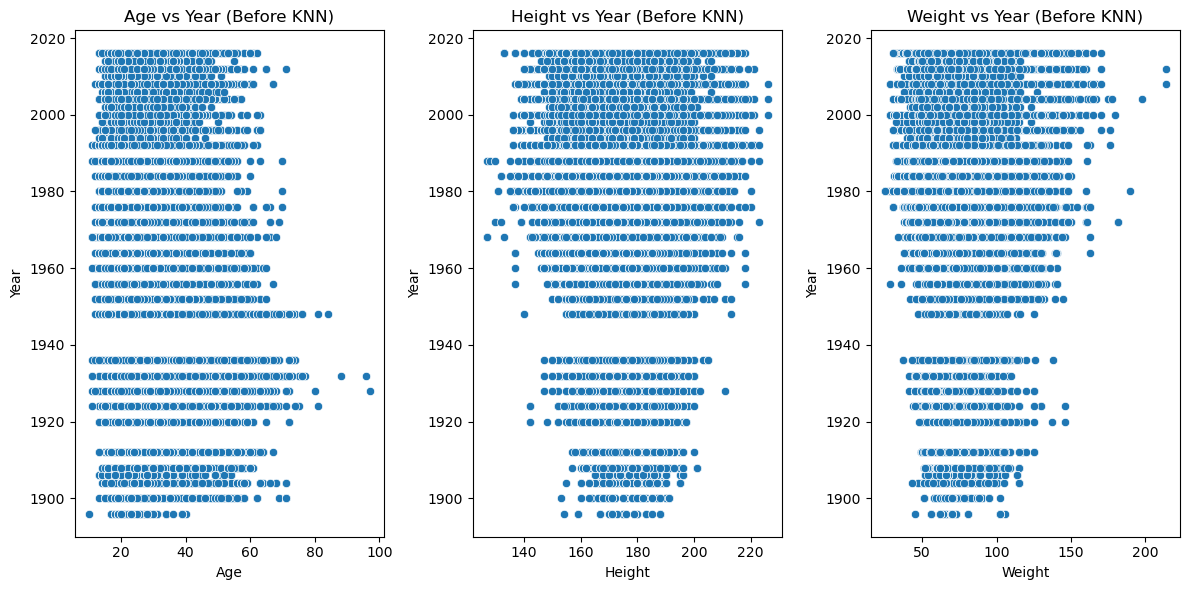

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# KNN 적용 전 분포도 시각화
plt.figure(figsize=(12, 6))

# Age vs Year 분포도
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Year', data=all_data)
plt.title('Age vs Year (Before KNN)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Height', y='Year', data=all_data)
plt.title('Height vs Year (Before KNN)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Weight', y='Year', data=all_data)
plt.title('Weight vs Year (Before KNN)')

plt.tight_layout()
plt.show()

# KNN모델 반영 전 결측치 추적
all_data['Age_was_missing'] = all_data['Age'].isnull()
all_data['Height_was_missing'] = all_data['Height'].isnull()
all_data['Weight_was_missing'] = all_data['Weight'].isnull()

In [7]:
# KNN Imputer 적용 코드
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# 'NOC' 열과 'Sport' 열을 Label Encoding으로 수치형 변환
le_noc = LabelEncoder()
all_data['NOC_encoded'] = le_noc.fit_transform(all_data['NOC'])

le_sport = LabelEncoder()
all_data['Sport_encoded'] = le_sport.fit_transform(all_data['Sport'])

# KNN을 적용할 열 목록 (국가와 종목 포함)
columns_to_impute = ['Age', 'Height', 'Weight', 'Sport_encoded', 'NOC_encoded']

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
all_data[columns_to_impute] = scaler.fit_transform(all_data[columns_to_impute])

# KNNImputer로 결측치 대체
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

# 스케일링을 원래대로 되돌림
all_data[columns_to_impute] = scaler.inverse_transform(all_data[columns_to_impute])

# 결측치가 잘 채워졌는지 확인
print(all_data.isnull().sum())
columns_to_impute = ['Age', 'Height', 'Weight']
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

ID                    0
Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal                 0
Region                0
Notes                 0
miss_data             0
Age_was_missing       0
Height_was_missing    0
Weight_was_missing    0
NOC_encoded           0
Sport_encoded         0
dtype: int64


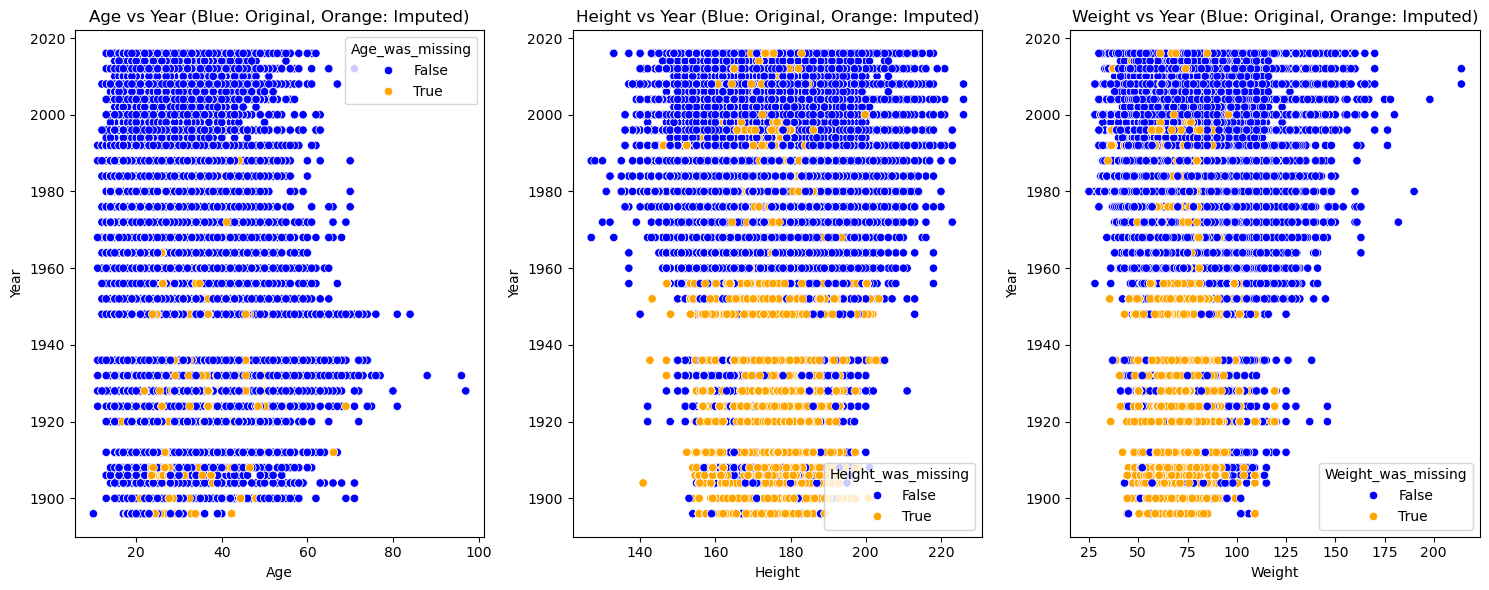

In [8]:
# KNN 적용 후 분포도 시각화
plt.figure(figsize=(15, 6))

# Age vs Year 분포도 (KNN 적용 후, 결측치 채워진 부분 추적)
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Year', data=all_data, hue='Age_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Age vs Year (Blue: Original, Orange: Imputed)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Height', y='Year', data=all_data, hue='Height_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Height vs Year (Blue: Original, Orange: Imputed)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Weight', y='Year', data=all_data, hue='Weight_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Weight vs Year (Blue: Original, Orange: Imputed)')

plt.tight_layout()
plt.show()

In [9]:
# 데이터 프레임 저장
all_data.to_csv('./Data/cleaned_all_data.csv', index=False)

이제 깨끗히 정리된 데이터가 준비되었으니. 
기본적인 분석을 진행 해보자
- 기본적 분석

In [10]:
# 올림픽에 참여한 총 선수 수
althlete_count = all_data['Name'].nunique()
print(f"Total number of athletes: {althlete_count}")

Total number of athletes: 134732


In [14]:
# 남성과 여성 선수 수 와 Pie chart
male_count = all_data[all_data['Sex'] == 'M']['Name'].nunique()
female_count = all_data[all_data['Sex'] == 'F']['Name'].nunique()
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of male athletes: 100979
Total number of female athletes: 33808


134,732 / 134,787
?? 차이가 발생하네 동명이인이라도 있나.


In [15]:
# 선수의 고유한 수를 이름, 성별, 국가 조합으로 계산
athlete_count = all_data[['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of athletes: {athlete_count}")

# 남성과 여성 선수 수 계산 (이름, 성별, 국가 조합 기준)
male_count = all_data[all_data['Sex'] == 'M'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
female_count = all_data[all_data['Sex'] == 'F'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of athletes: 136657
Total number of male athletes: 102337
Total number of female athletes: 34320
